<a href="https://colab.research.google.com/github/vsevolod-BR/prictice/blob/main/home_work_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10695 non-null  int64  
 1   ID               10695 non-null  int64  
 2   Gender           10695 non-null  object 
 3   Ever_Married     10505 non-null  object 
 4   Age              10695 non-null  int64  
 5   Graduated        10593 non-null  object 
 6   Profession       10533 non-null  object 
 7   Work_Experience  9597 non-null   float64
 8   Spending_Score   10695 non-null  object 
 9   Family_Size      10247 non-null  float64
 10  Var_1            10587 non-null  object 
 11  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1002.8+ KB
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B   3

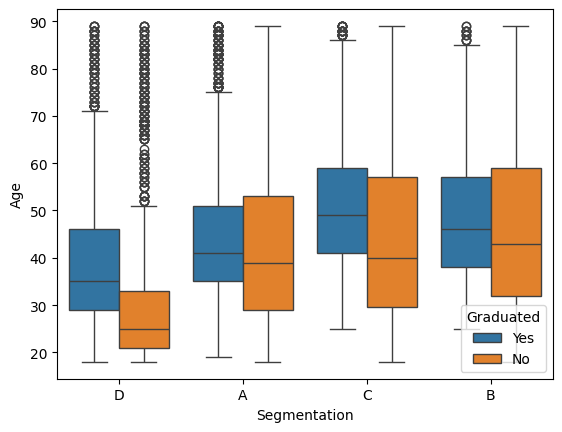

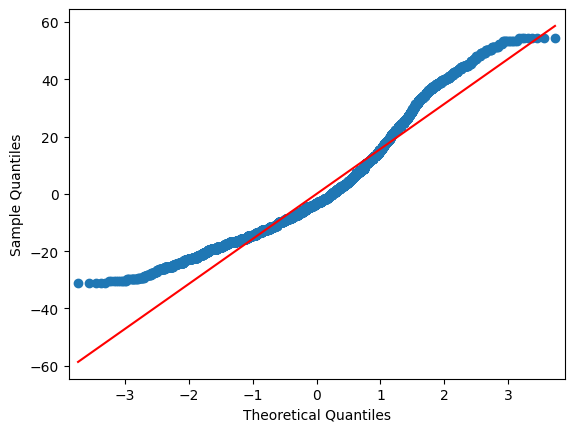

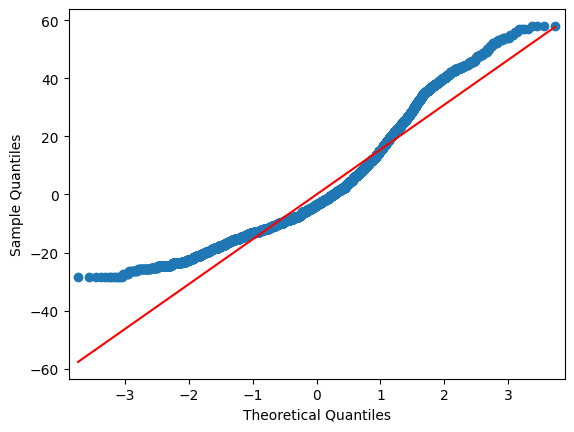

In [14]:
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv('Customer Segmentation.csv')
data.head()
data.info()

data = data[data.Graduated.isna() != True] # удаляем пропущенные значения
sns.boxplot(data=data, x='Segmentation', y='Age', hue='Graduated')

one_way = ols('Age ~ Segmentation', data).fit() # однофакторный анализ
anova_lm(one_way)

sm.qqplot(one_way.resid, line='s') #qq-plot, нормальность остатков

groups = [] #разделение на сегменты для проведения теста Левина
for group_id, group in data.groupby(['Segmentation']):
    groups.append(group.Age)

stats.bartlett(*groups) #тест Левина

print(pairwise_tukeyhsd(endog=data.Age, groups=data.Segmentation, alpha=0.05)) # апостериарный анализ

two_way = ols('Age ~ Segmentation + Graduated + Segmentation:Graduated', data).fit() # двухфакторный анализ
anova_lm(two_way)

sm.qqplot(two_way.resid, line='s') #qq-plot, нормальность остатков

groups = [] #разделение на сегменты для проведения теста Левина
for group_id, group in data.groupby(['Segmentation', 'Graduated']):
    groups.append(group.Age)

stats.bartlett(*groups) #тест Левина

data['combination'] = data.Segmentation + '/' + data.Graduated # апостериарный анализ
print(pairwise_tukeyhsd(endog=data.Age.astype('float'), groups=data.combination, alpha=0.05))